# Titanic survival prediction

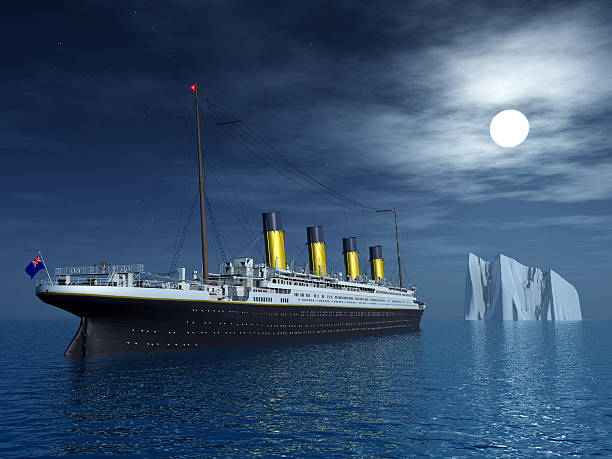

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv('/content/titanic_train.csv')

# Explanatory Data Analysis

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df = df.drop(['PassengerId', 'Ticket', 'Name'], axis = 1)

In [ ]:
df.duplicated().sum()

107

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df = df.drop(['Cabin'], axis = 1)

In [ ]:
df.duplicated().sum()

111

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

Embarked - has 2 null values - it is categprical no we go with mode.

In [ ]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(df['Embarked'].mode()[0])

S


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Age - has 177 null values - it is continuous in nature.
First we have to check the distrubution of age,
If it is positively / left skewed - mean > median --> replace with mean.

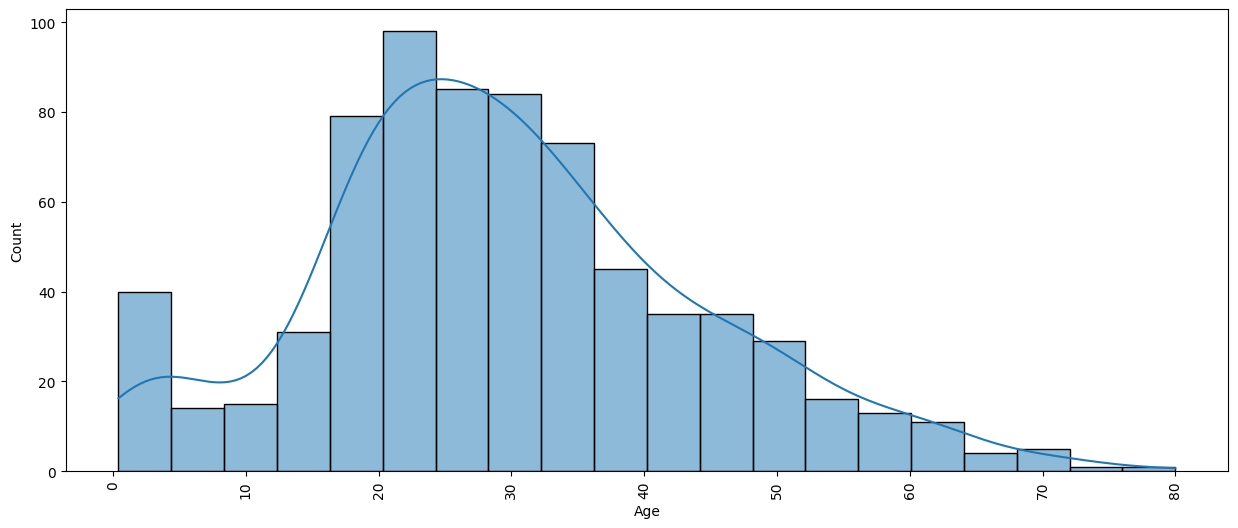

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['Age'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Sex', 'Embarked'], dtype='object')

Numerical type columns:
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Sex', 'Embarked']
Non-Categorical Features: []
Discrete Features: ['Survived', 'Pclass', 'SibSp', 'Parch']
Continuous Features: ['Age', 'Fare']


# Data Visualization

**Discrete**

In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Survived
[0 1]

Pclass
[3 1 2]

SibSp
[1 0 3 4 2 5 8]

Parch
[0 1 2 5 3 4 6]



In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64



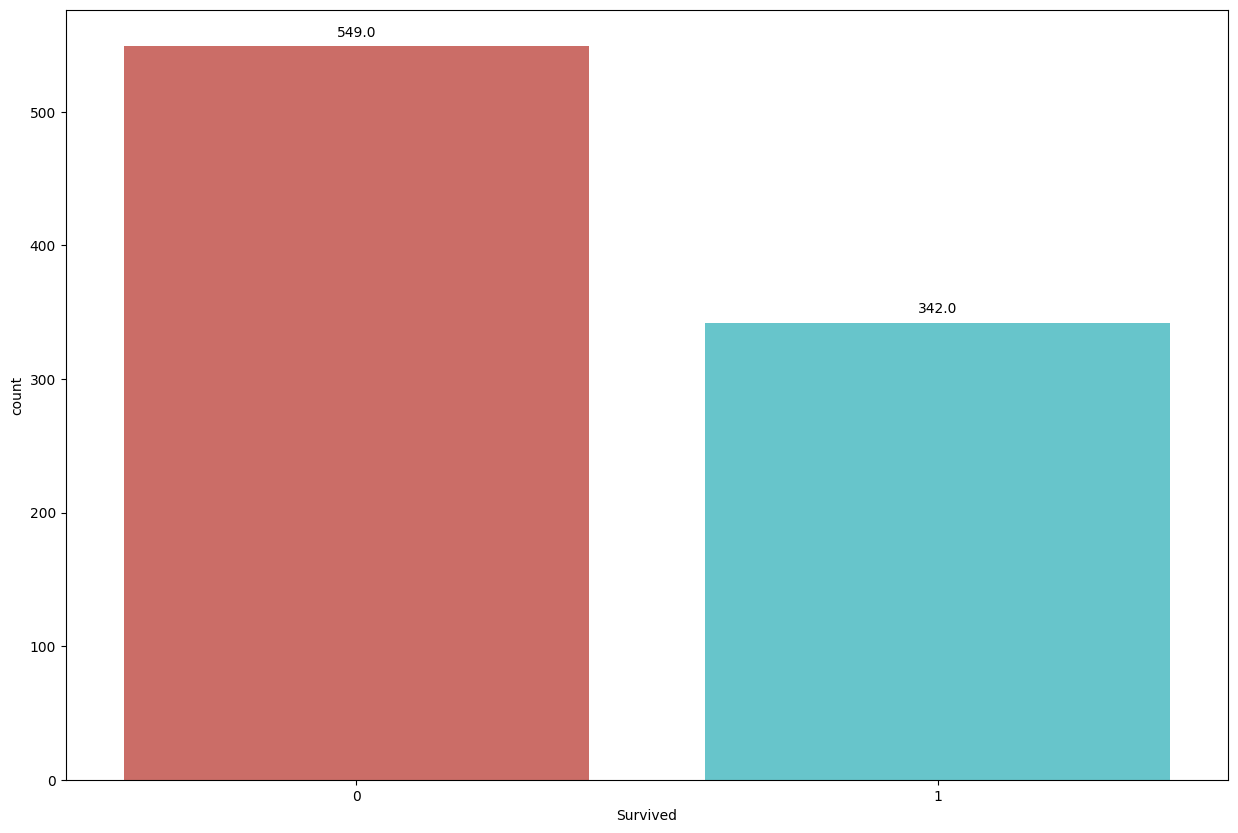

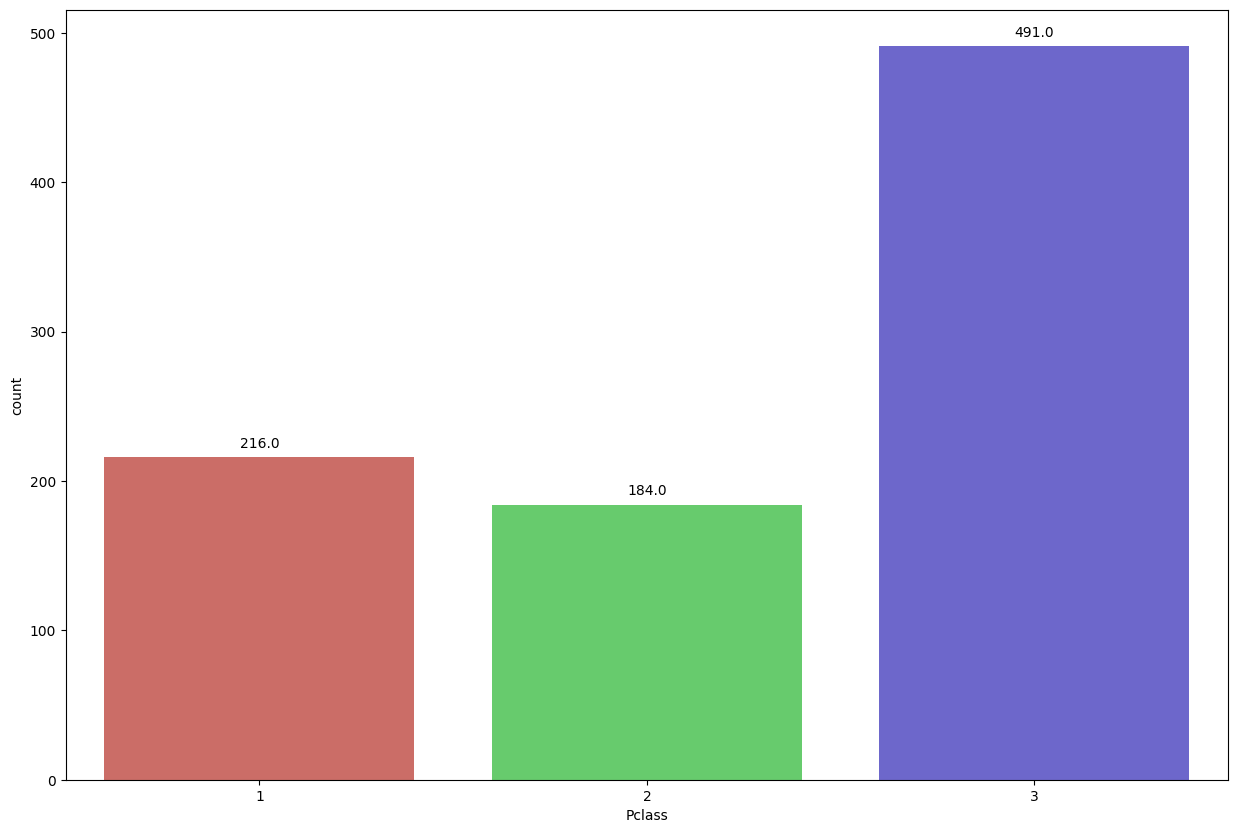

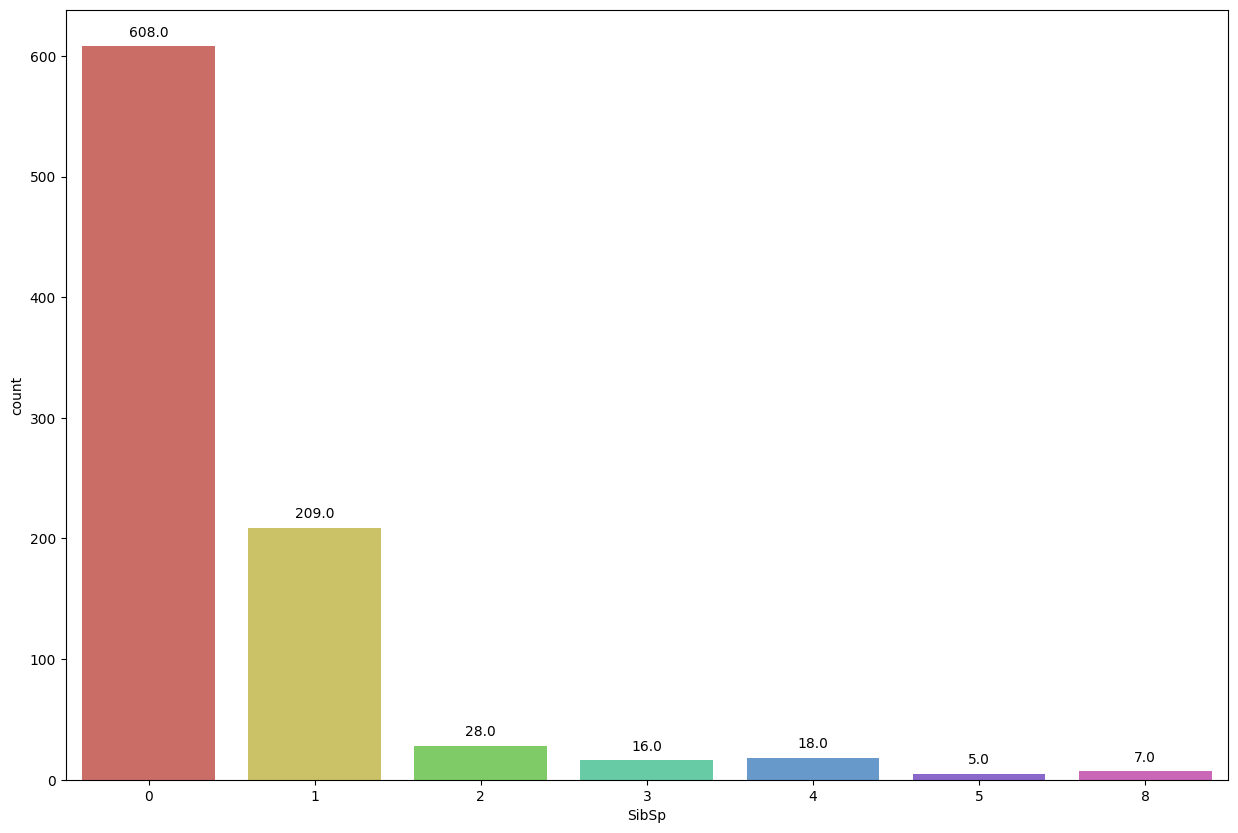

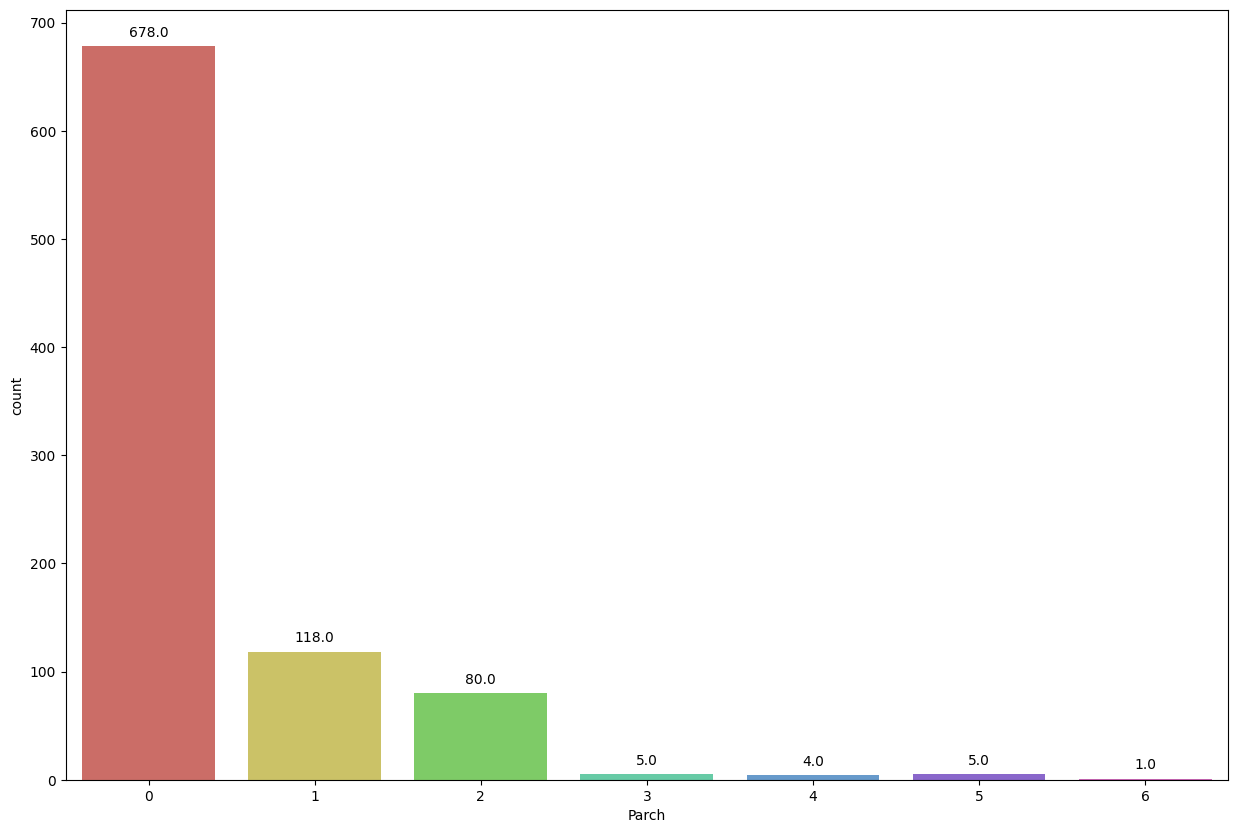

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

**Categorical**

In [ ]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Sex
['male' 'female']

Embarked
['S' 'C' 'Q']



In [ ]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Sex
Sex
male      577
female    314
Name: count, dtype: int64

Embarked
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64



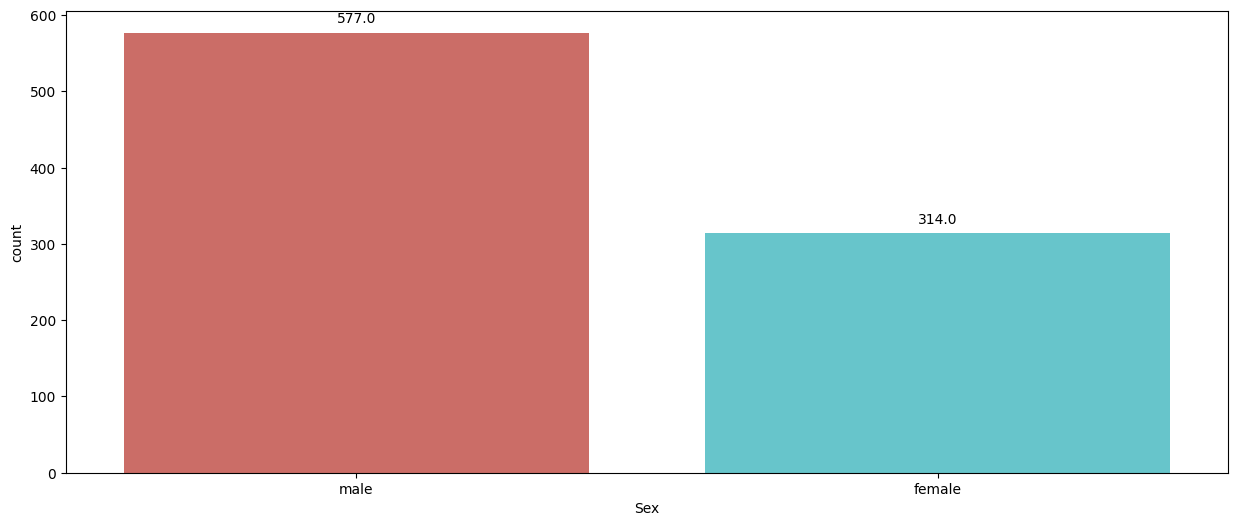

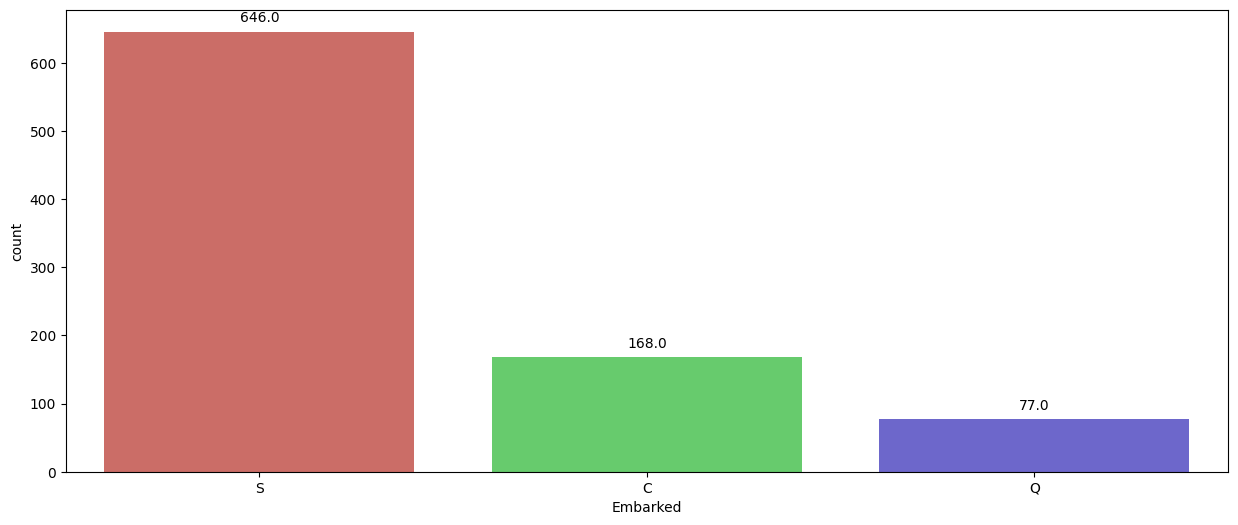

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

**Continuous**

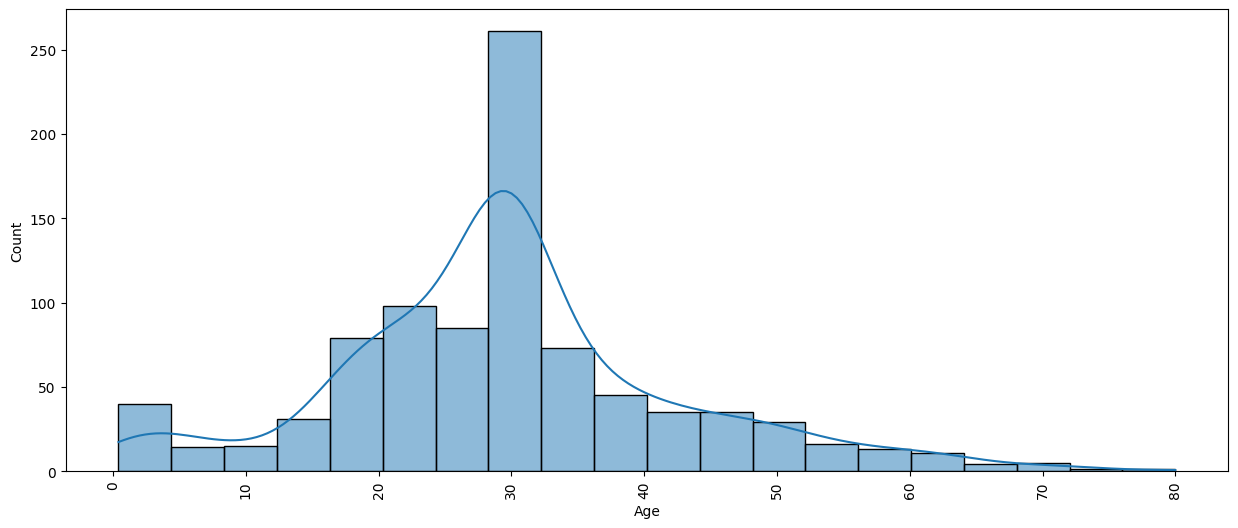

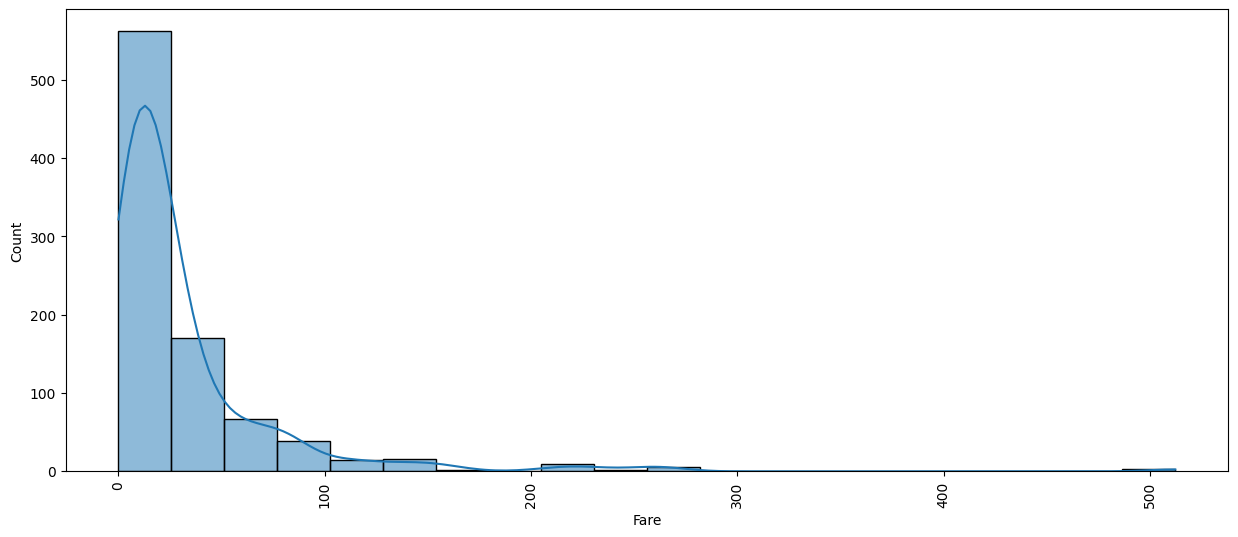

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

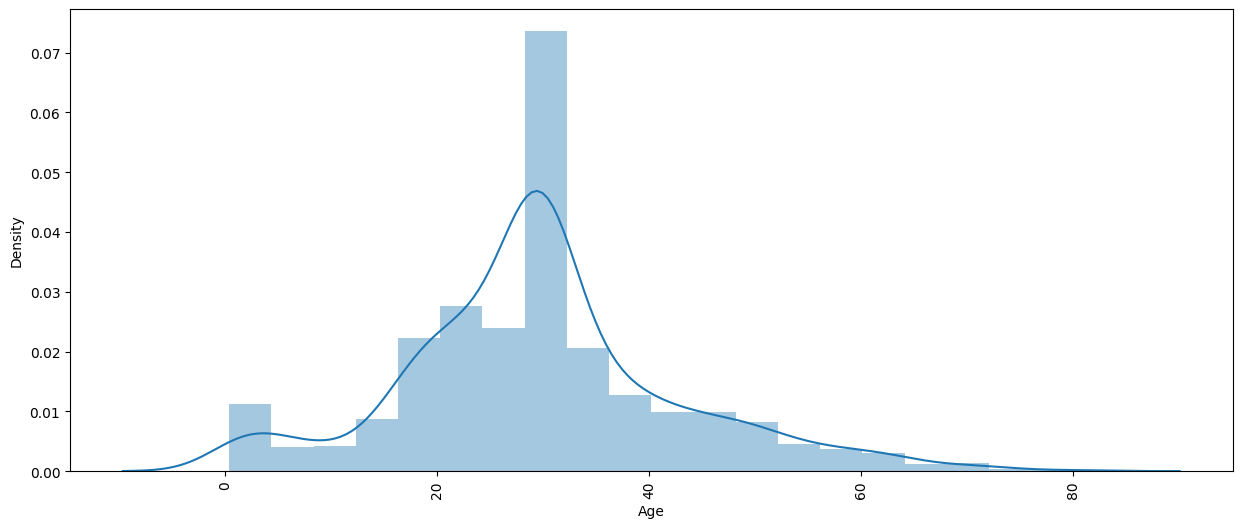

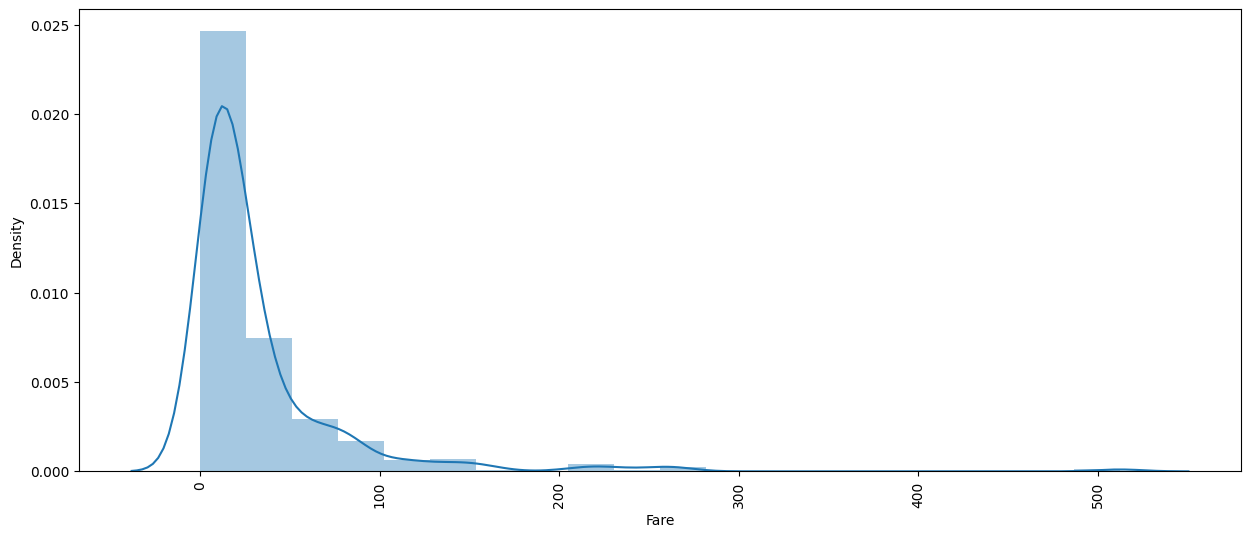

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

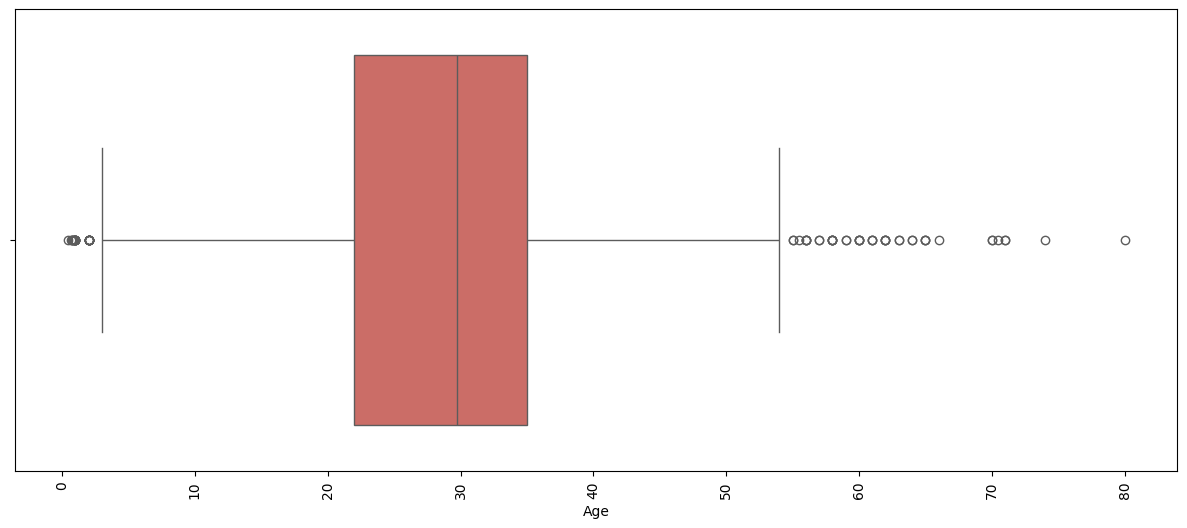

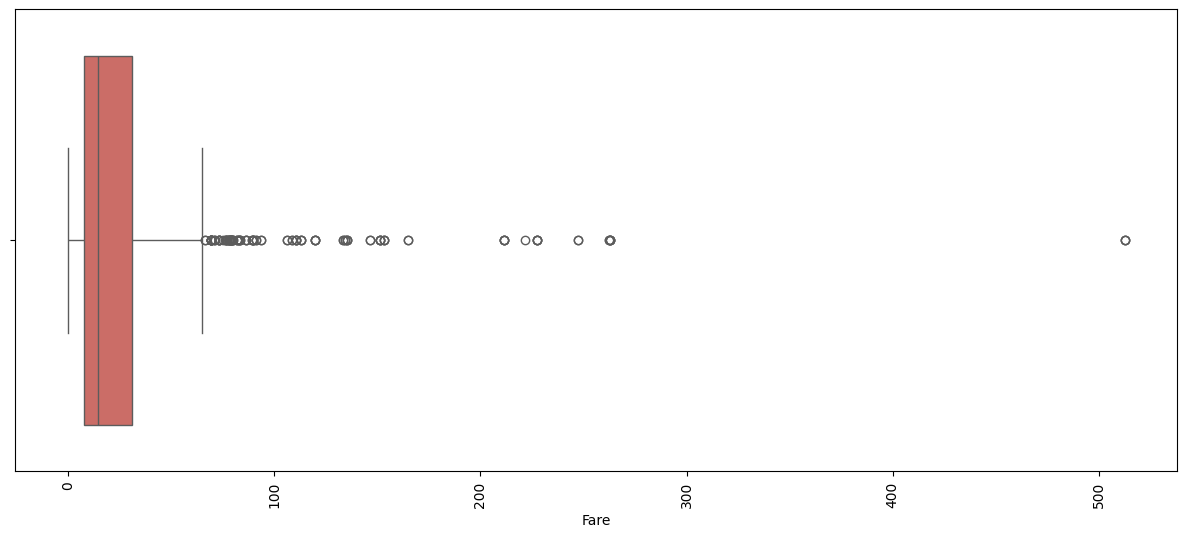

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

**Bivariate analysis**

AGE V/S FARE

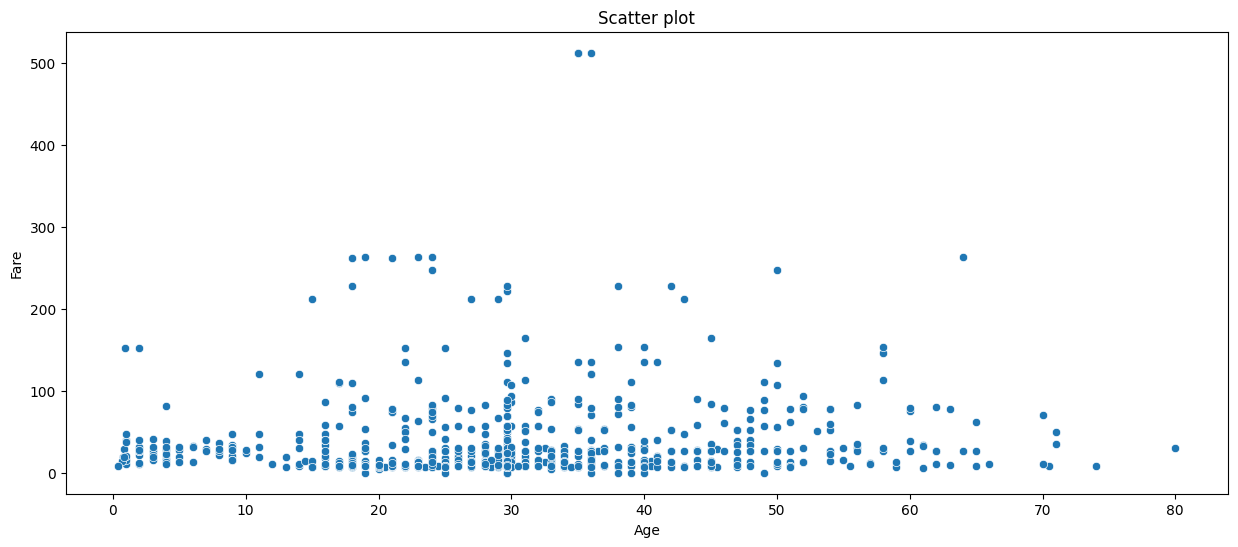

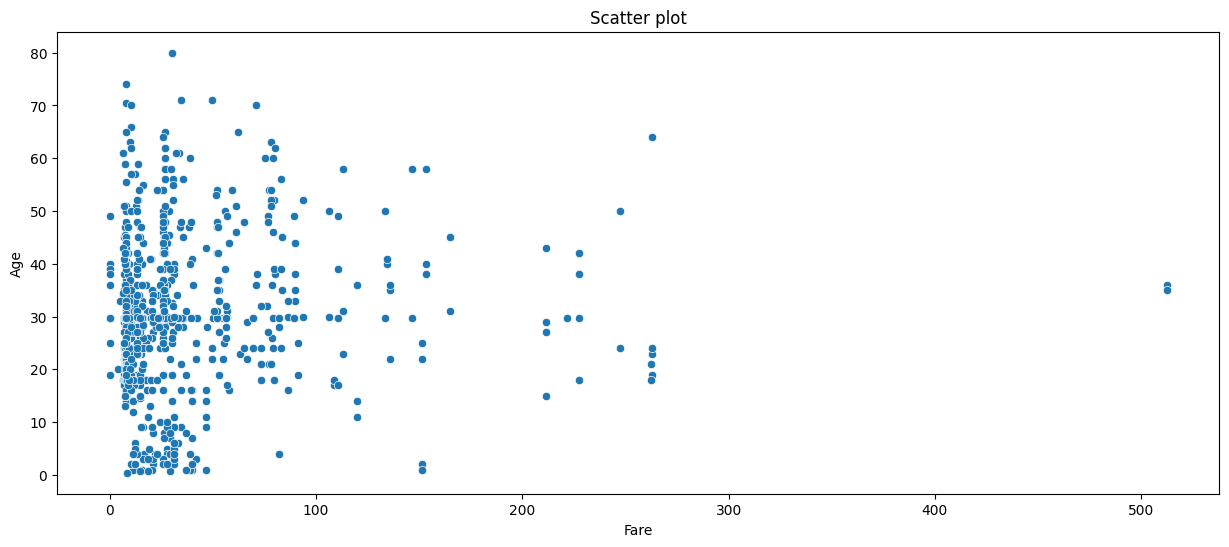

In [ ]:
for i in continuous:
    for j in continuous:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

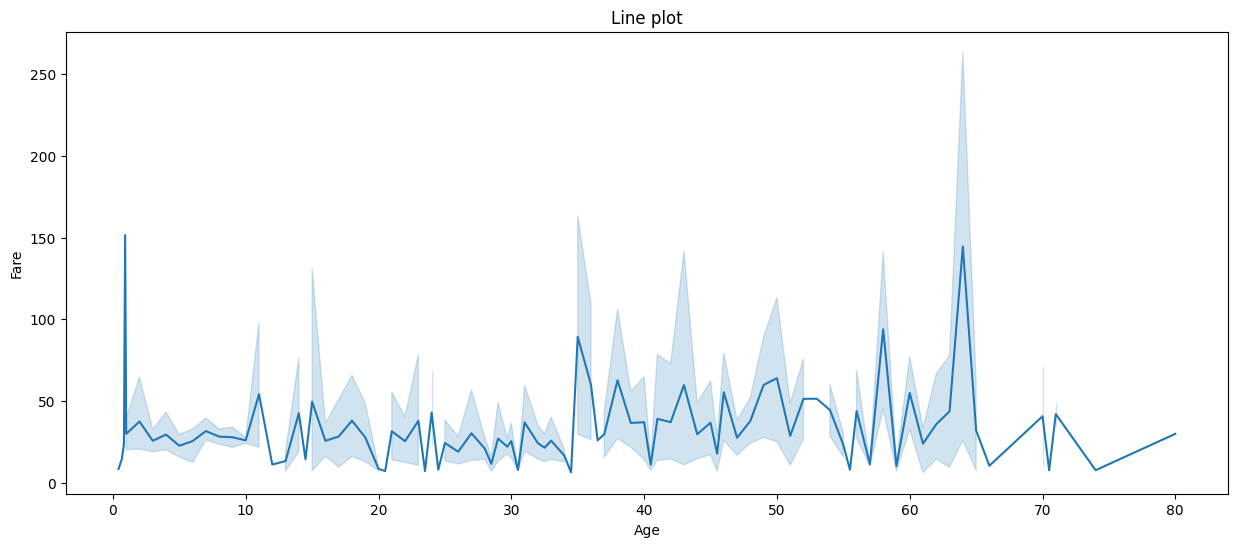

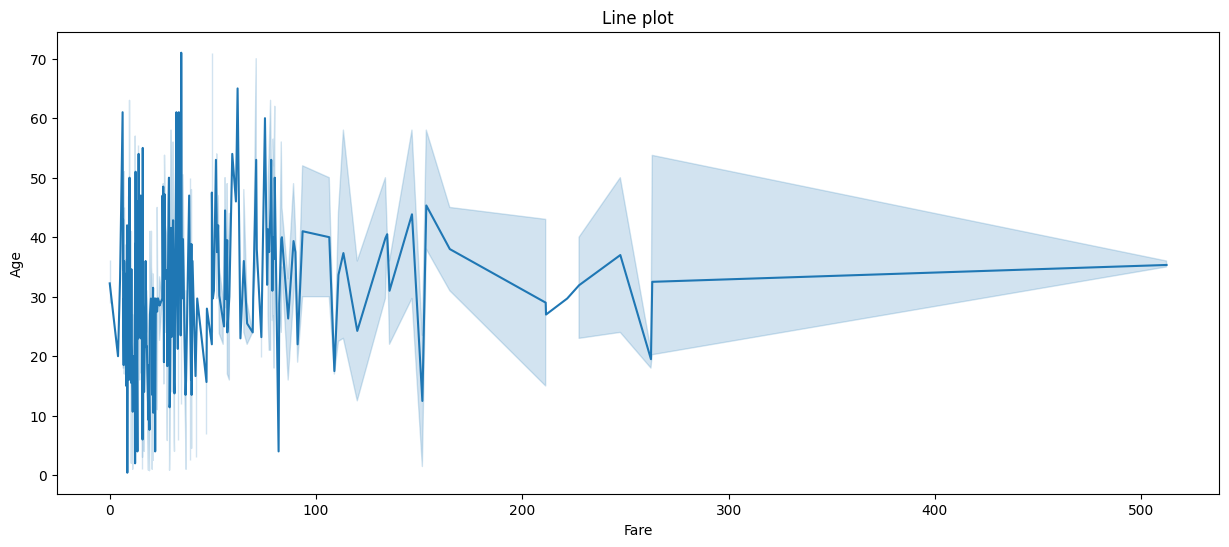

In [ ]:
for i in continuous:
    for j in continuous:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.lineplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Line plot')
          plt.show()

SEX V/S EMBARKED

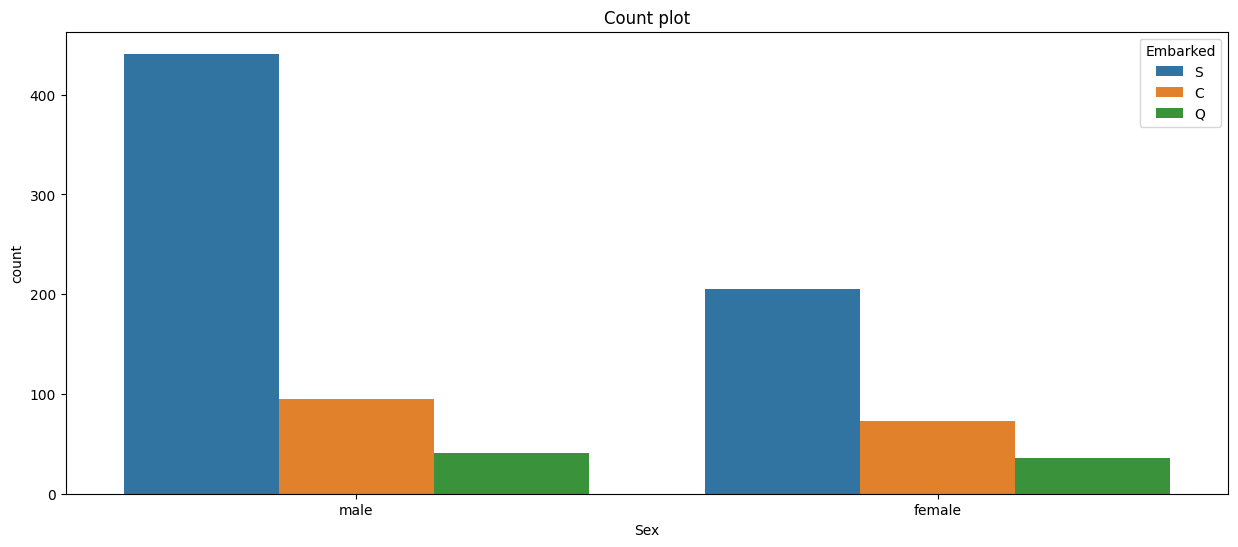

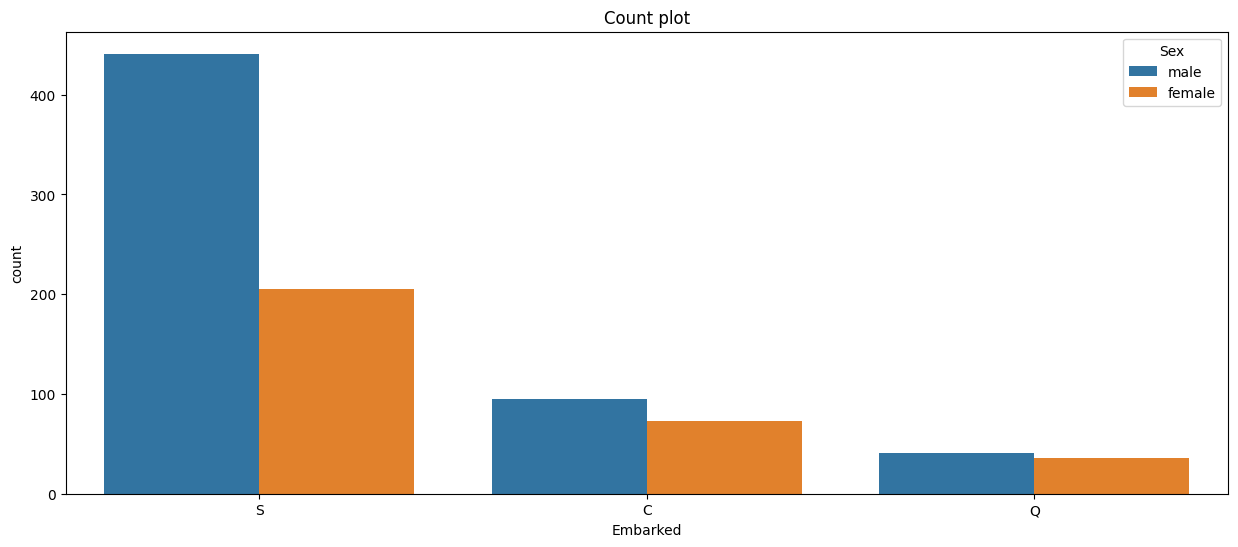

In [ ]:
for i in categorical:
    for j in categorical:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.countplot(data=df, x = i, hue = j)
          plt.title(f'Count plot')
          plt.show()

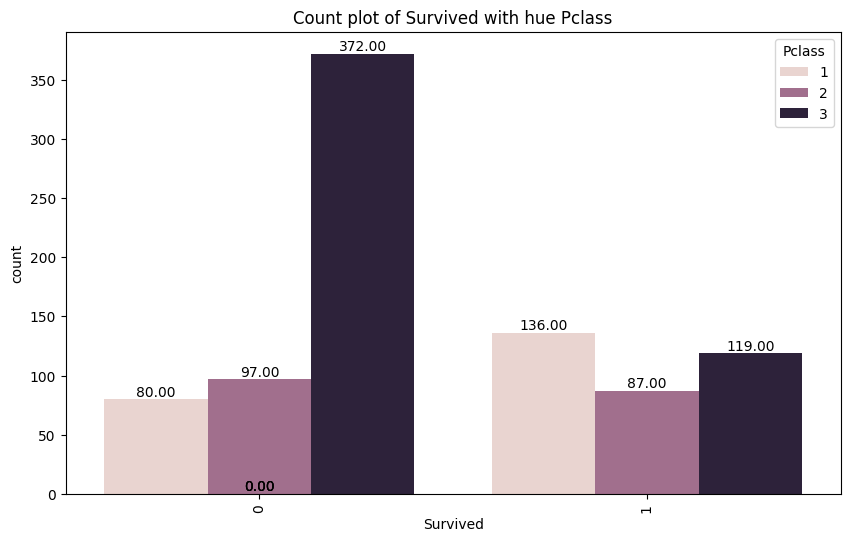

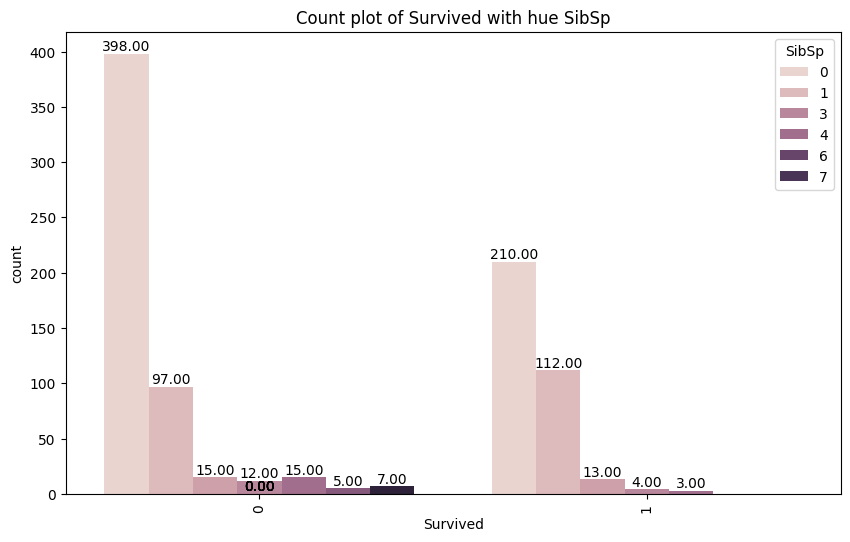

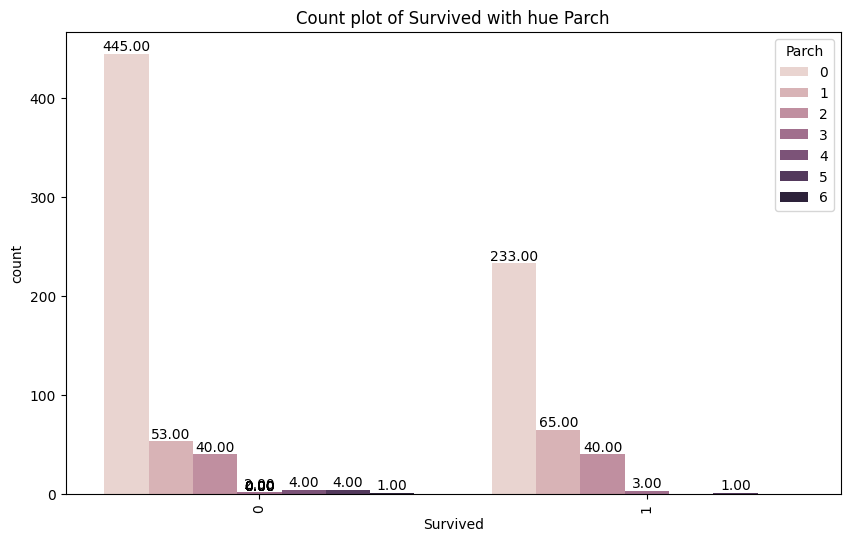

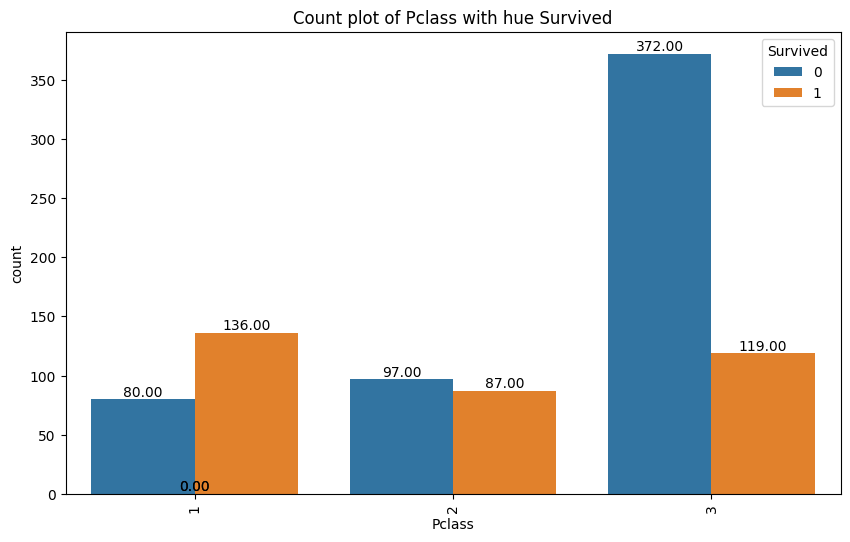

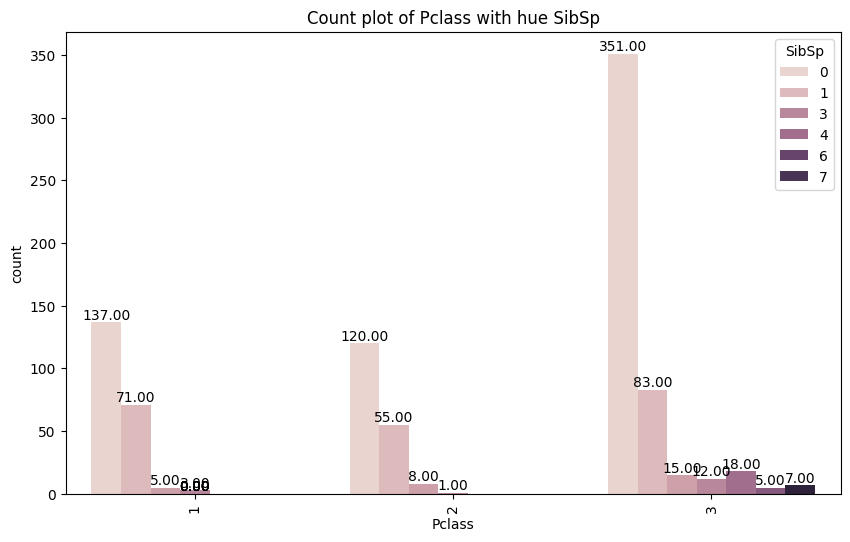

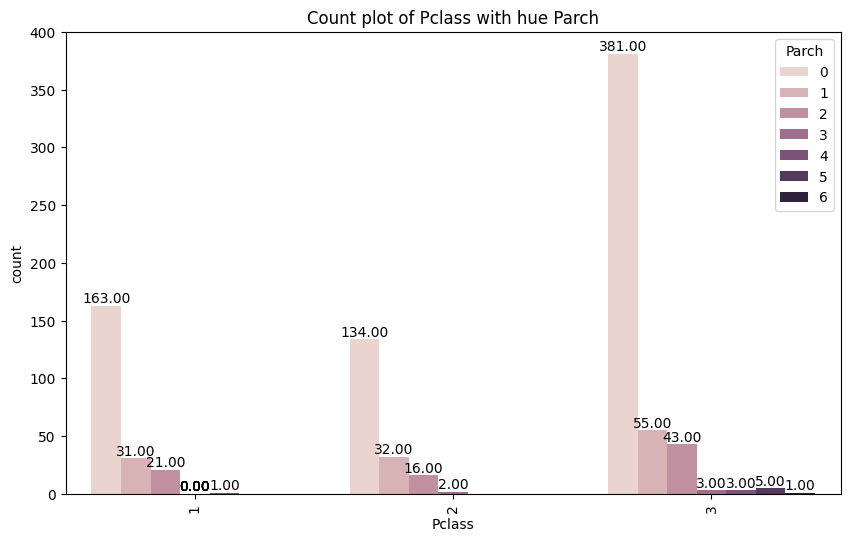

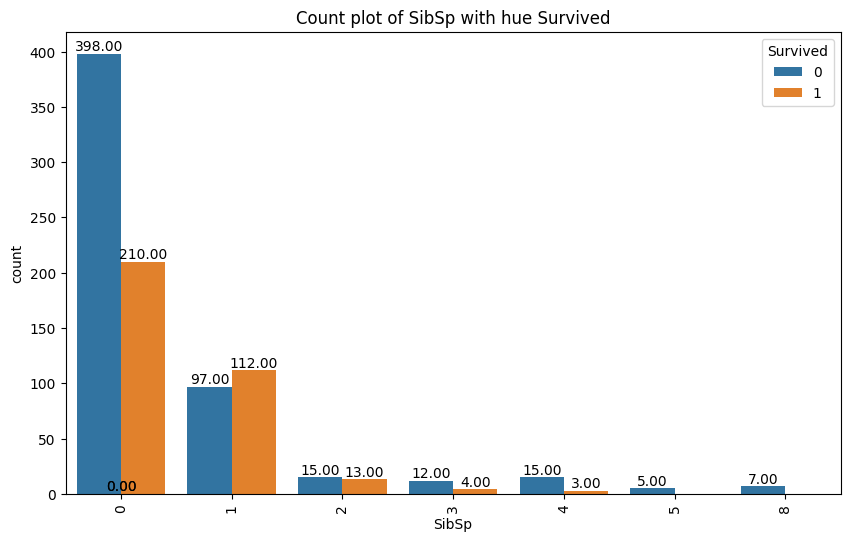

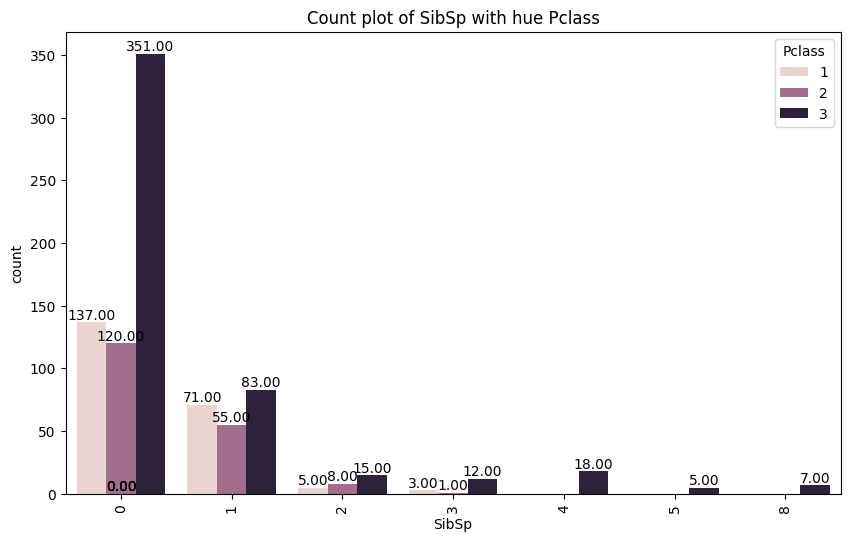

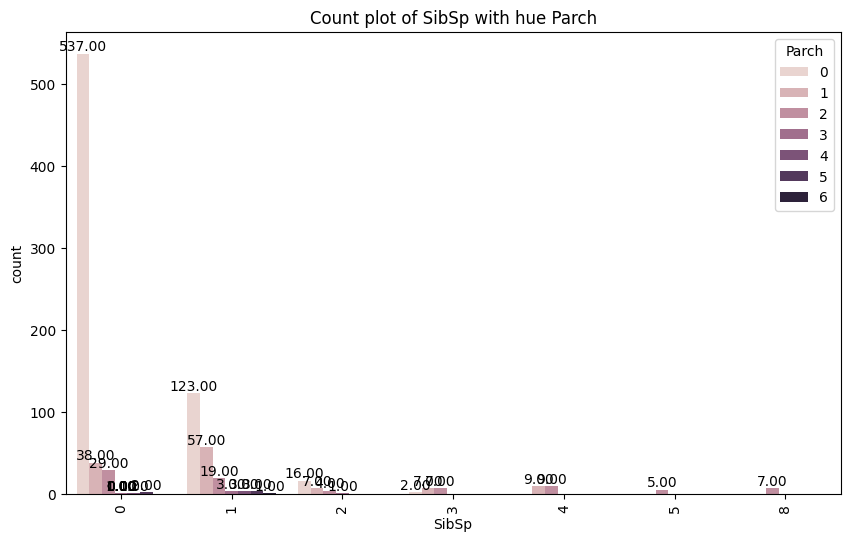

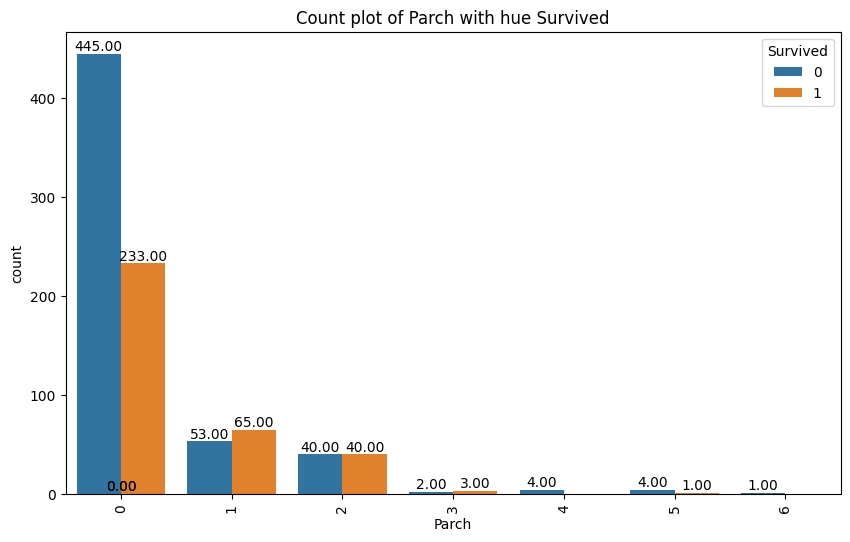

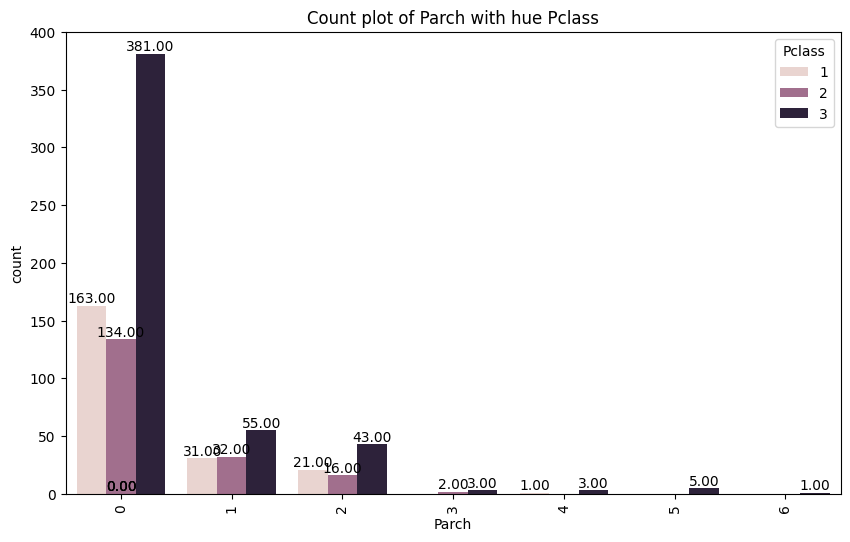

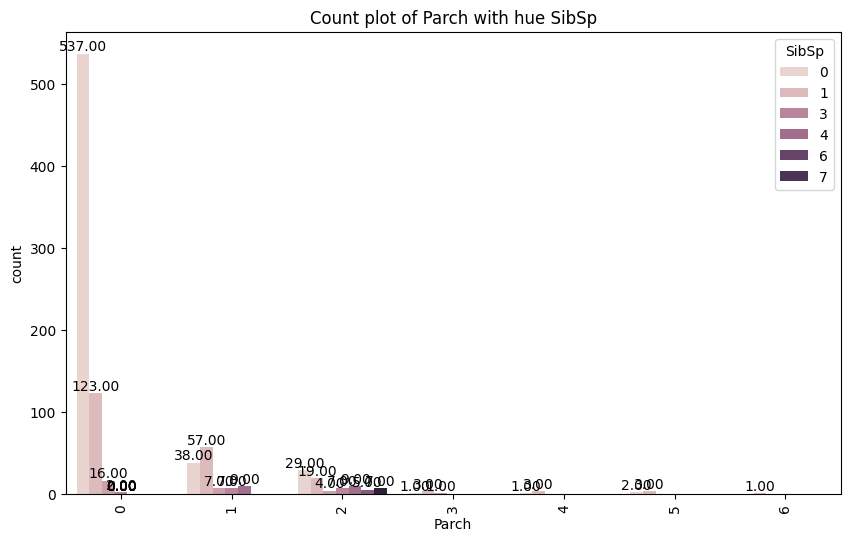

In [ ]:
for i in discrete:
    for j in discrete:
        if i != j:
            plt.figure(figsize=(10, 6))
            ax = sns.countplot(data=df, x=i, hue=j)
            plt.title(f'Count plot of {i} with hue {j}')
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=10, color='black', rotation=0)
            plt.xticks(rotation=90)
            plt.show()

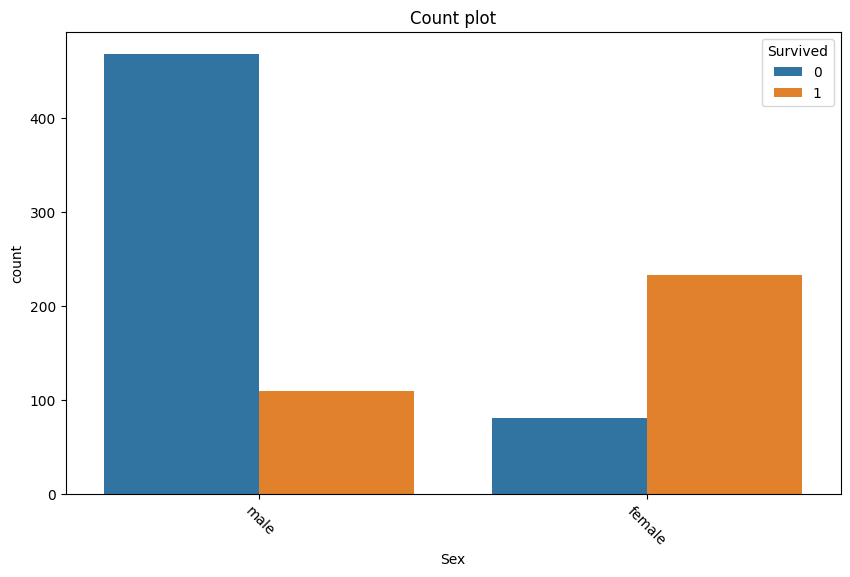

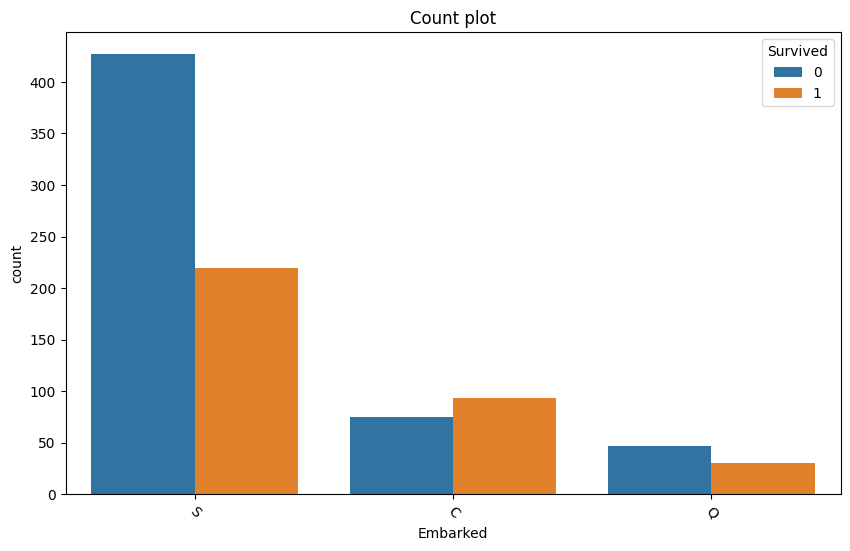

In [ ]:
for i in categorical:
    for j in categorical:
      if i != j:
          plt.figure(figsize=(10, 6))
          sns.countplot(data=df, x = i, hue = 'Survived')
          plt.xticks(rotation=-45)
          plt.title(f'Count plot')
          plt.show()

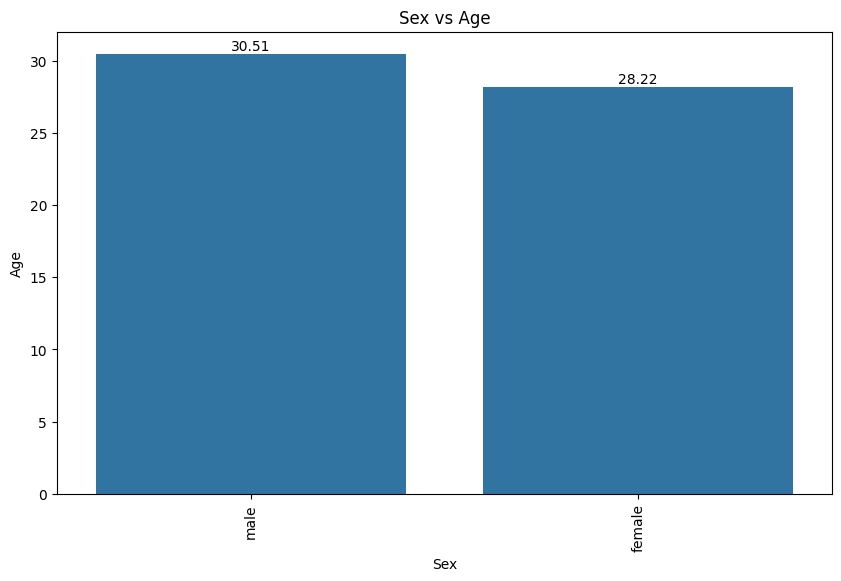

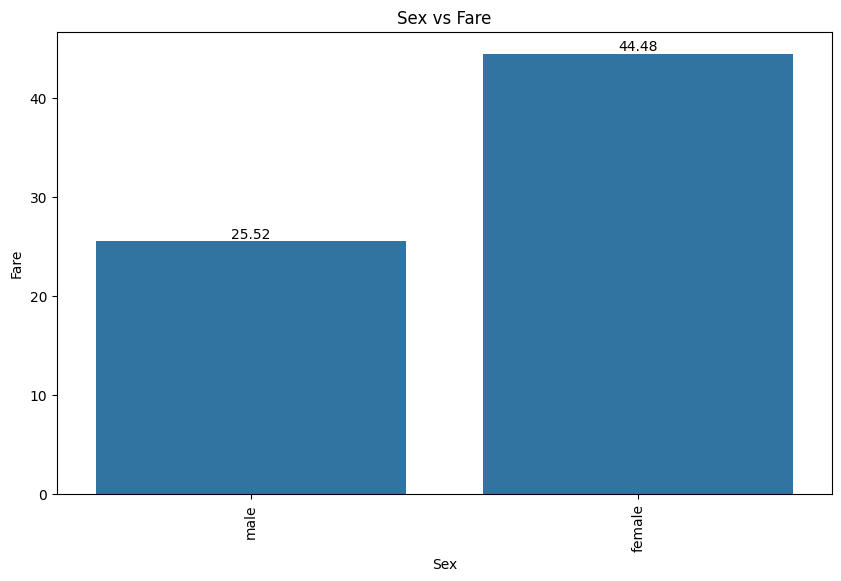

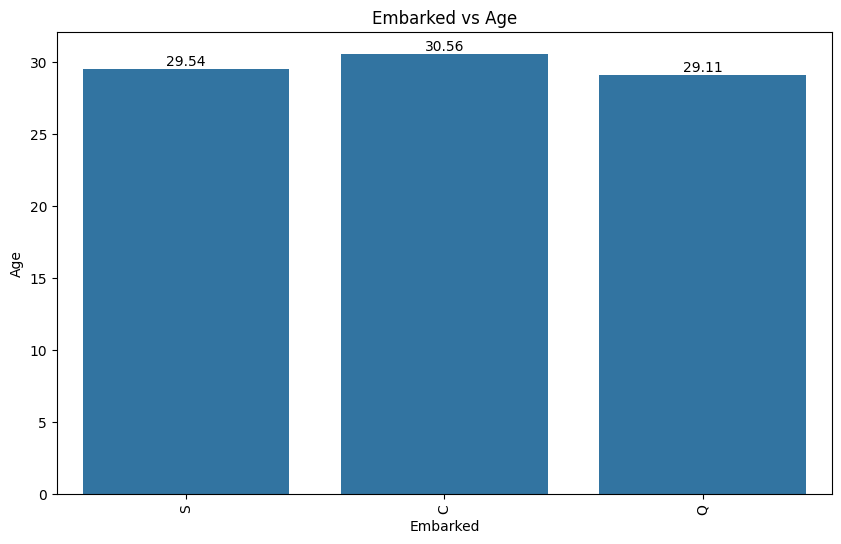

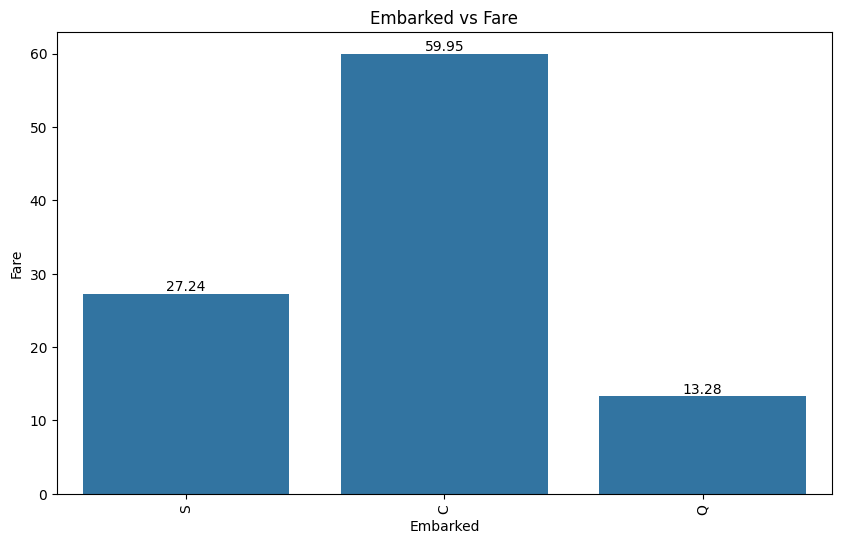

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

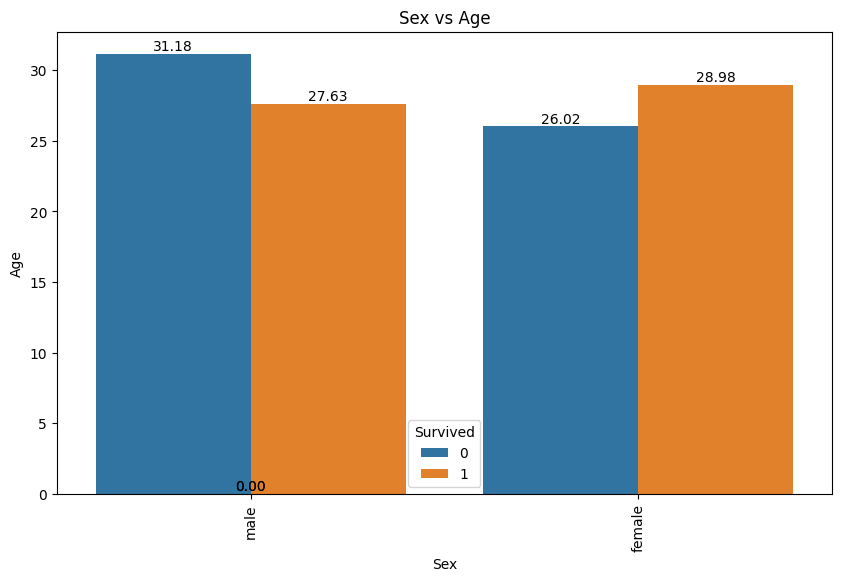

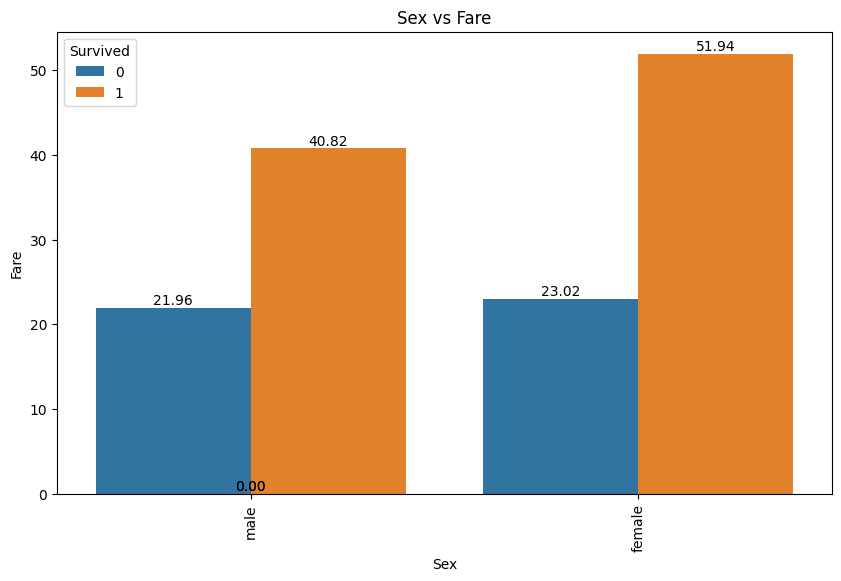

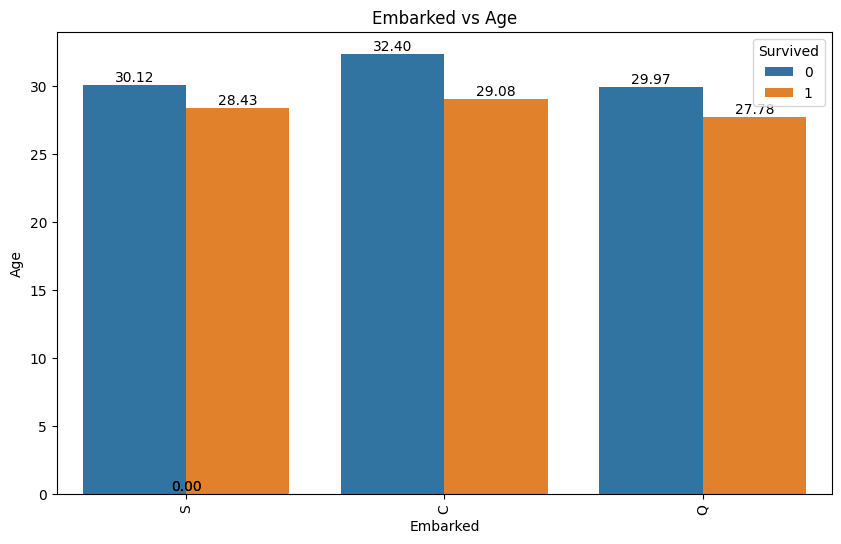

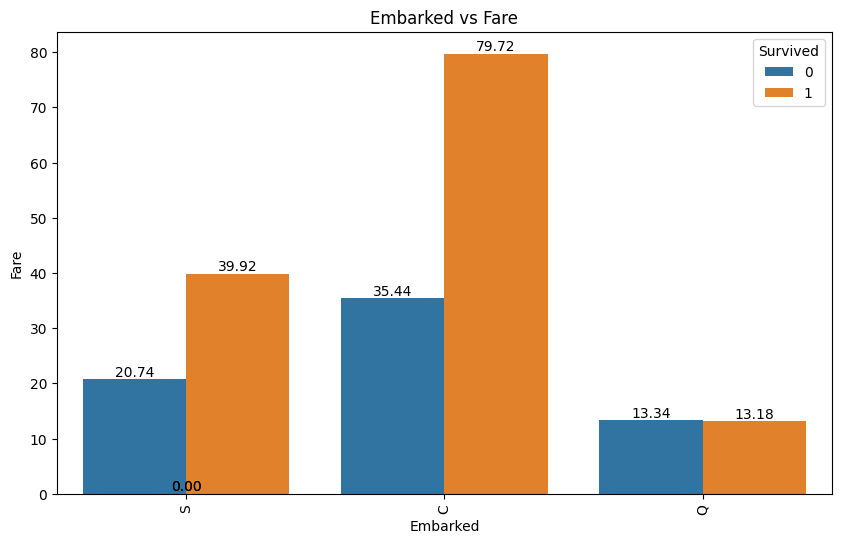

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, hue = 'Survived', ci=None) #ci = confidence interval
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

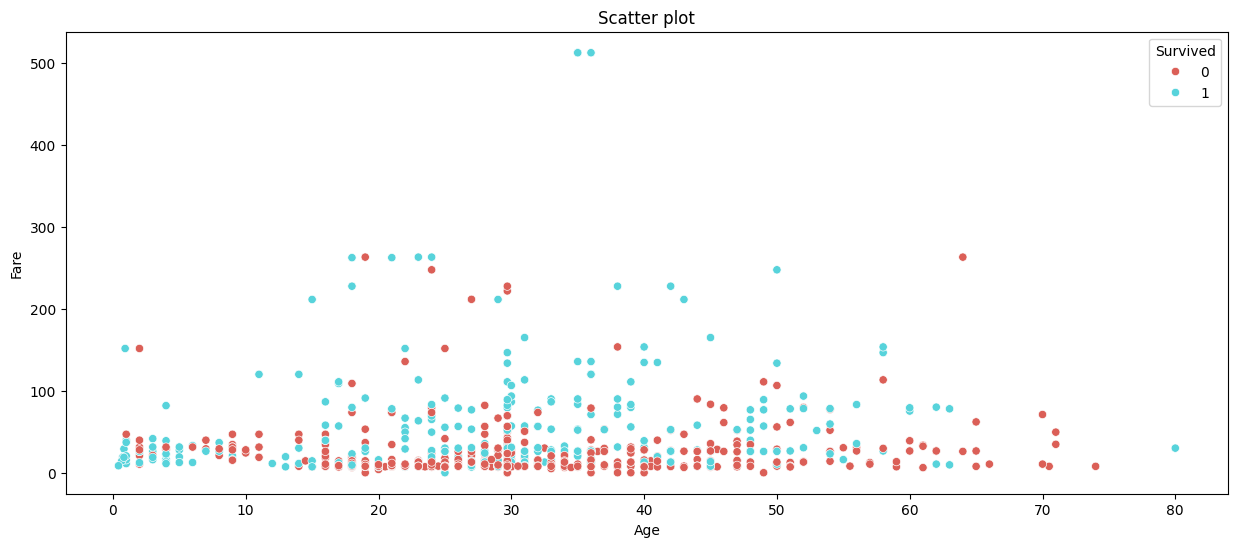

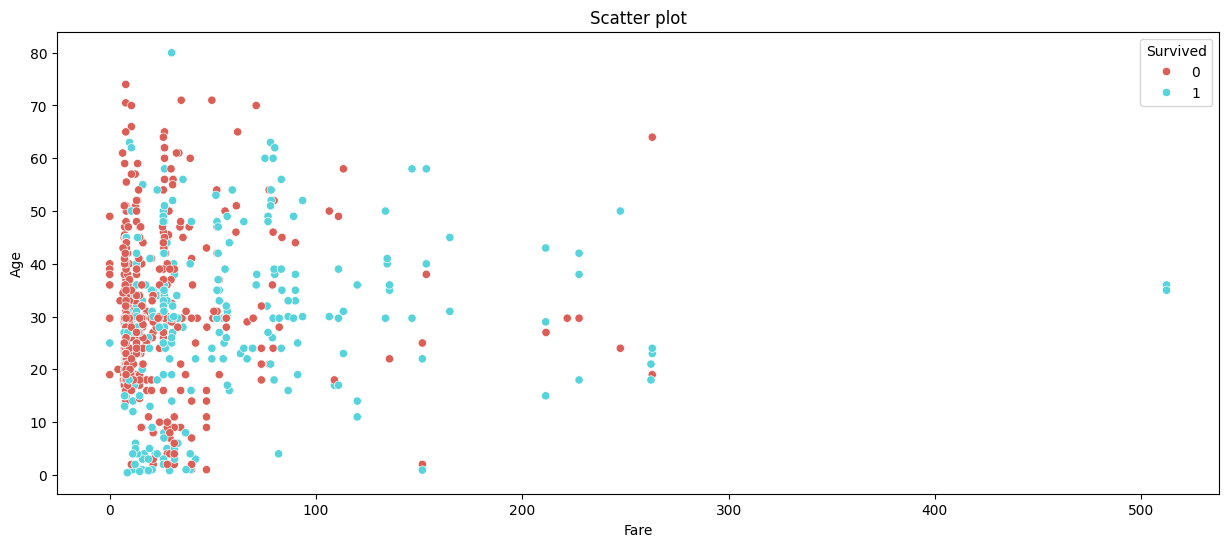

In [ ]:
for i in continuous:
    for j in continuous:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, hue = 'Survived', data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

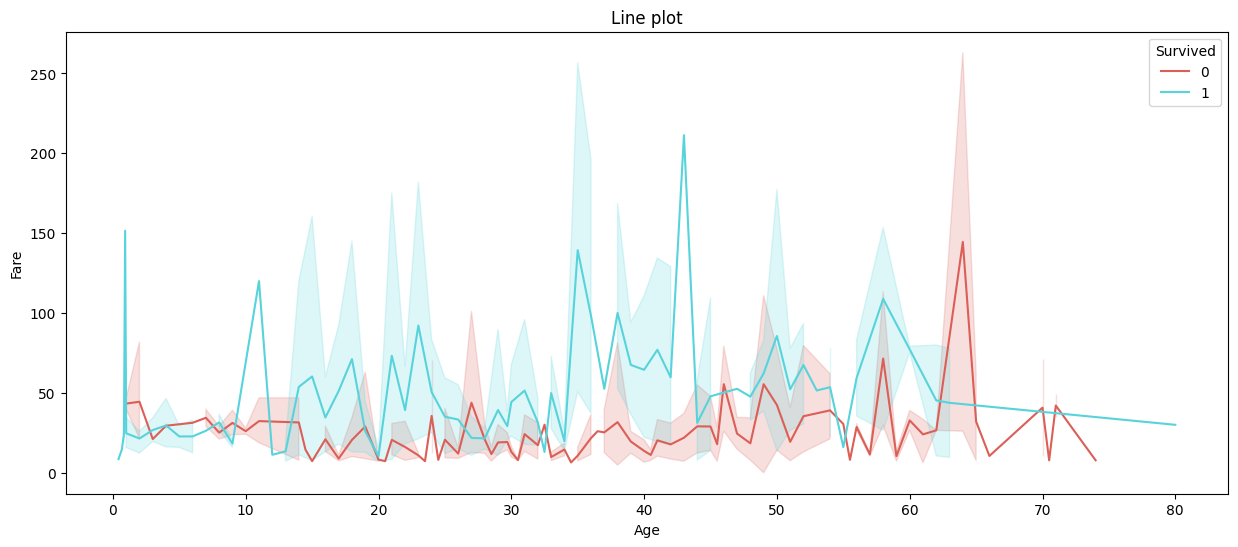

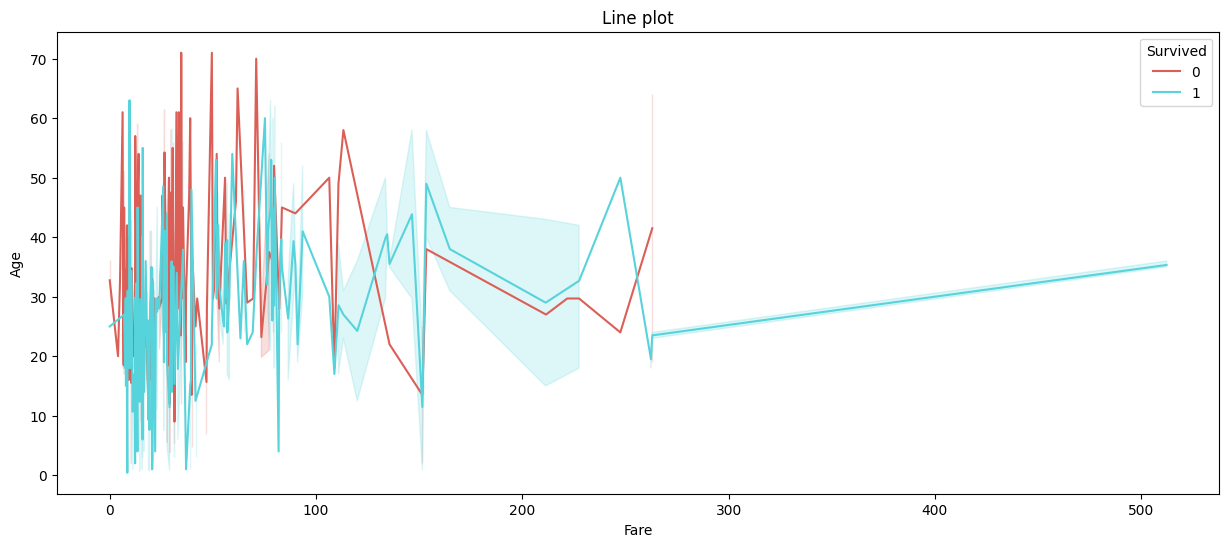

In [ ]:
for i in continuous:
    for j in continuous:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.lineplot(x=i, y=j, hue = 'Survived', data=df, palette='hls')
          plt.title(f'Line plot')
          plt.show()

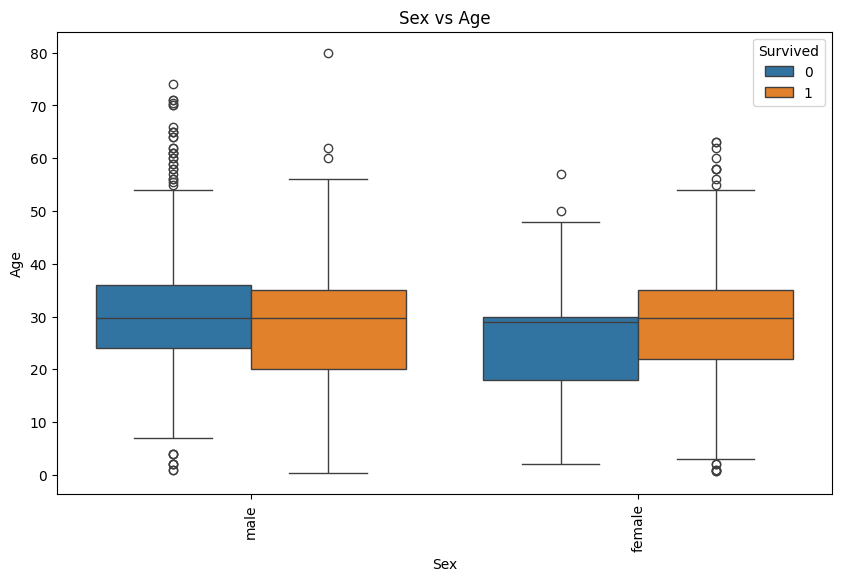

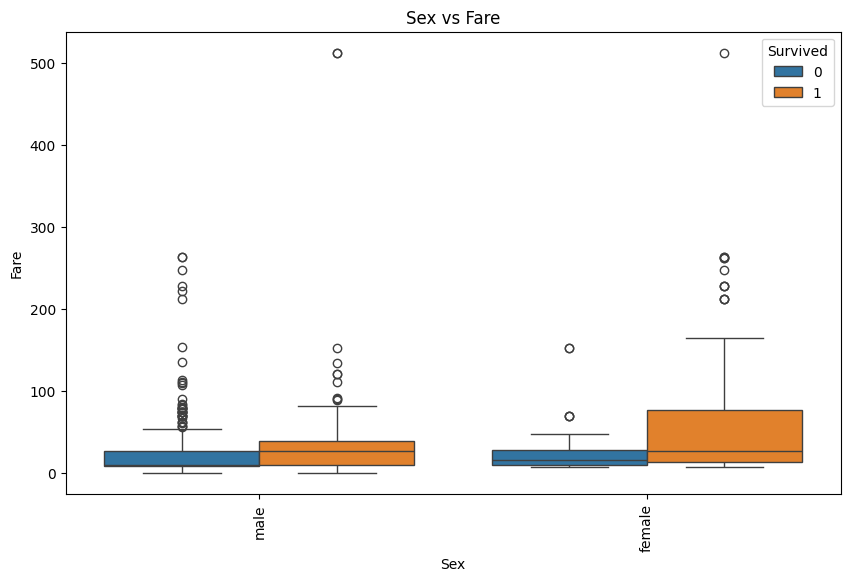

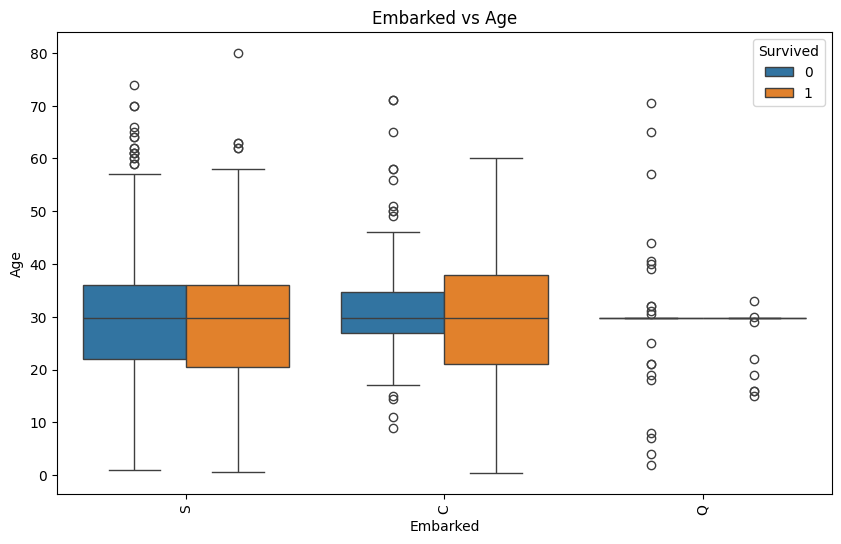

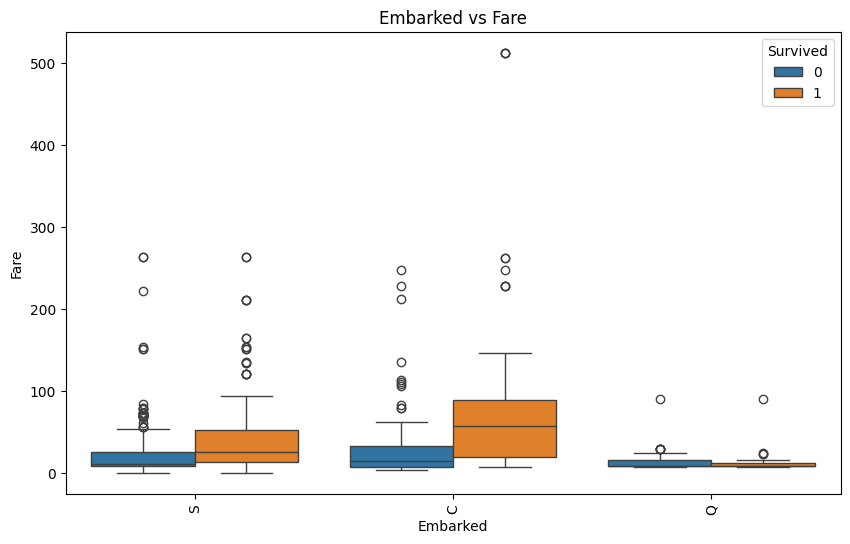

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(data=df, x=cat, y=cont, hue = 'Survived')
        plt.title(f'{cat} vs {cont}')
        plt.xticks(rotation = 90)
        plt.show()

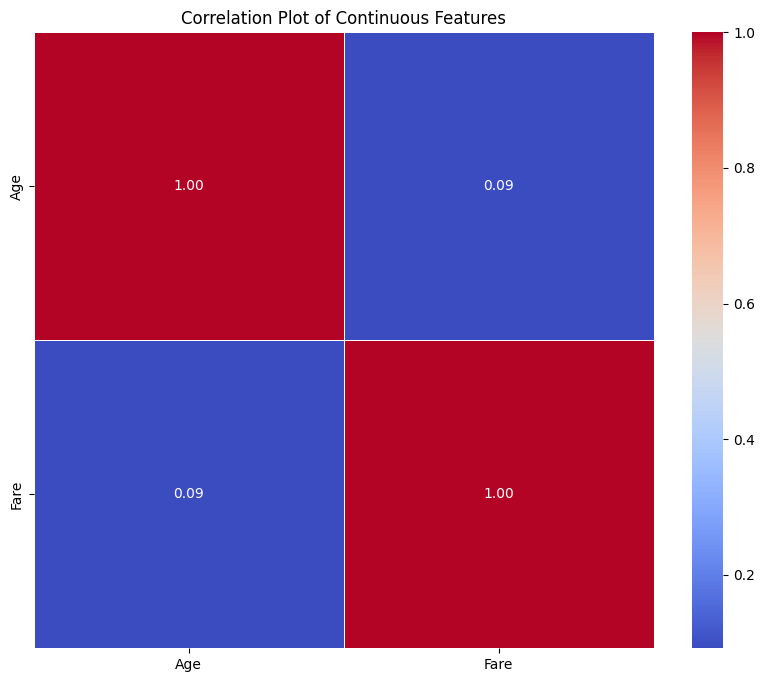

In [ ]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [ ]:
avg_age_by_gender = df.groupby('Sex')['Age'].mean().sort_values(ascending=False)
print(avg_age_by_gender)

Sex
male      30.505824
female    28.216730
Name: Age, dtype: float64


In [ ]:
avg_age_by_gender = df.groupby('Sex')[['Age','Fare']].mean().sort_values(ascending=False,by='Fare')
avg_age_by_gender

,Age,Fare
Sex,,
female,28.216730,44.479818
male,30.505824,25.523893


In [ ]:
avg_age_by_gender = df.groupby(['Sex','Survived'])[['Age','Fare']].mean().sort_values(ascending=True,by='Fare')
avg_age_by_gender

,,Age,Fare
Sex,Survived,,
male,0,31.175224,21.960993
female,0,26.023272,23.024385
male,1,27.631705,40.821484
female,1,28.979263,51.938573


#Creating dummies

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False


# Data Modeling & Training


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y,
                                                    random_state=42)

> **stratify = y :** The stratify parameter is used to ensure that the class distribution in the target variable y is preserved in both the training and test sets. This is particularly important for imbalanced datasets where certain . classes are underrepresented.

> if we didnt use this, there is a chance that my model will be trained only on either 0's or 1's (since data is unbalanced). Hence, my model becomes **biased.**

> **random_state = 42 :**  makes sure that accuracy will not change how many multiple times we run our code. Fix the sample and data points, so if we re run the code - accuracy will not be affected.

In [ ]:
from sklearn.linear_model import LogisticRegression

> Data is unbalaned - cant be trained.
> First make equal number of 0's and 1's.
> There are 2 techniques:
1. **Oversampling**(make minoriy equal to majority by increasing) - **SMOTE** \\
    > Here duplicates are created (duplicating authentic data) for minority till become equal to majority. \\
    > resampling is only done to training data, not to testing data.
2. **Undersampling**(make majority equal to minority by decreasing).

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
y_train_res

0      1
1      0
2      0
3      1
4      1
      ..
873    1
874    1
875    1
876    1
877    1
Name: Survived, Length: 878, dtype: int64

In [ ]:
y_train

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64

In [ ]:
X_train.shape

(712, 10)

In [ ]:
X_train_res.shape

(878, 10)

In [ ]:
y_train.unique()

array([1, 0])

In [ ]:
y_train_res.unique()

array([1, 0])

In [ ]:
y_train.value_counts()

Survived
0    439
1    273
Name: count, dtype: int64

In [ ]:
y_train_res.value_counts()

Survived
1    439
0    439
Name: count, dtype: int64

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

#Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

accuacy = correct predicted / total

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8212290502793296


In [ ]:
precision = precision_score(y_test, y_pred)

print(precision)

0.7761194029850746


In [ ]:
recall = recall_score(y_test, y_pred)

print(recall)

0.7536231884057971


In [ ]:
f1 = f1_score(y_test, y_pred)

print(f1)

0.7647058823529411


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[95 15]
 [17 52]]


In [ ]:
y_prob = logreg.predict_proba(X_test)
print(y_prob)


[[0.91874799 0.08125201]
 [0.94433522 0.05566478]
 [0.79163655 0.20836345]
 [0.96208615 0.03791385]
 [0.27933758 0.72066242]
 [0.48318307 0.51681693]
 [0.1768756  0.8231244 ]
 [0.60773387 0.39226613]
 [0.65200387 0.34799613]
 [0.80331904 0.19668096]
 [0.80779614 0.19220386]
 [0.887555   0.112445  ]
 [0.30708037 0.69291963]
 [0.7439302  0.2560698 ]
 [0.53222092 0.46777908]
 [0.77165432 0.22834568]
 [0.61654215 0.38345785]
 [0.88358821 0.11641179]
 [0.80833899 0.19166101]
 [0.16376411 0.83623589]
 [0.88358821 0.11641179]
 [0.17110479 0.82889521]
 [0.88501691 0.11498309]
 [0.50921372 0.49078628]
 [0.88024446 0.11975554]
 [0.02481705 0.97518295]
 [0.80779614 0.19220386]
 [0.7058013  0.2941987 ]
 [0.84002409 0.15997591]
 [0.84266843 0.15733157]
 [0.90260127 0.09739873]
 [0.03304644 0.96695356]
 [0.89842133 0.10157867]
 [0.85930559 0.14069441]
 [0.82551498 0.17448502]
 [0.79105385 0.20894615]
 [0.79482553 0.20517447]
 [0.65655644 0.34344356]
 [0.80779614 0.19220386]
 [0.11294913 0.88705087]


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



> macro avg = average of each (precision, recall, f1-score) \\
> weighted avg = sum of each (support * class value) / total support \\
  example: (0.85 * 110 + 0.78 * 69) / (110 + 69)


In [ ]:
pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc

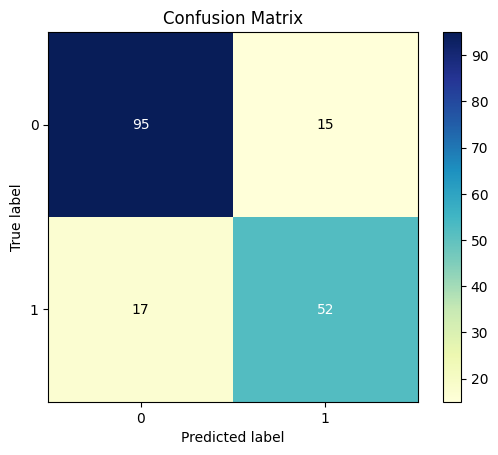

In [ ]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

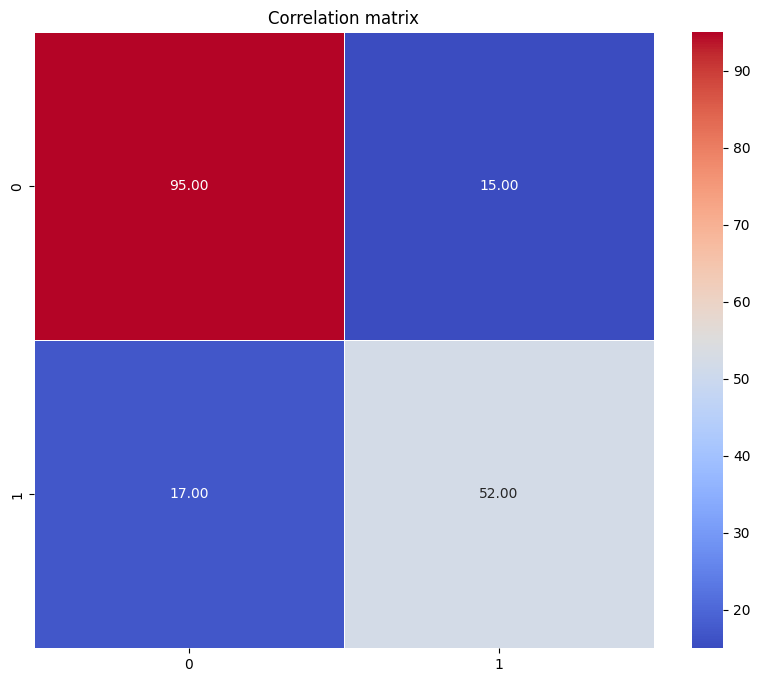

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

> The Area Under the ROC Curve (**AUC-ROC**) is a measure of how well a
classification model can distinguish between two classes, usually positive
and negative. The ROC (**Receiver Operating Characteristic**) curve is a
graphical representation of the performance of a binary classifier, which
plots the true positive rate (**TPR**) against the false positive rate (**FPR**) at various threshold settings.

> The AUC-ROC is calculated as the area under the ROC curve, which ranges from
0 to 1. A higher AUC-ROC indicates better performance, with a **perfect
classifier having an AUC-ROC of 1**

> Overall, the ROC curve and AUC-ROC are useful tools for **evaluating the
performance of binary classifiers**, as they provide a graphical representation
of the **trade-off** between the true positive rate and false positive rate at
different threshold values, and a quantitative measure of the overall
performance of the classifier.

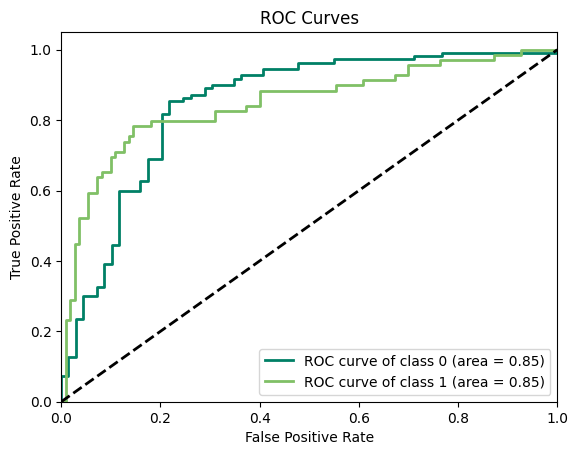

In [ ]:
plot_roc(y_test, y_prob, plot_macro= False, plot_micro= False, cmap= 'summer')
plt.show()